In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread("img/0002.jpg",0)
img = img/255
img = 1-img

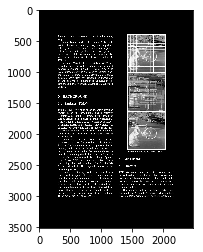

In [7]:
fig = plt.figure()
plt.imshow(img,cmap="gray")
plt.show()

In [8]:
kernel1 = np.ones((1, 40), np.uint8)
kernel2 = np.ones((60, 1), np.uint8)

In [9]:
dilate1 = cv2.dilate(img, kernel1)
erode1 = cv2.erode(dilate1, kernel1)

In [10]:
dilate2 = cv2.dilate(img, kernel2)
erode2 = cv2.erode(dilate2, kernel2)

In [11]:
intersection = cv2.bitwise_and(erode1, erode2)

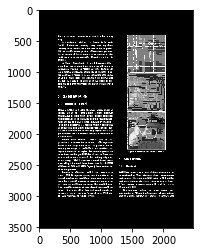

In [12]:
fig = plt.figure()
plt.imshow(intersection,cmap="gray")
plt.show()

In [13]:
kernel3 = np.ones((10, 1), np.uint8)
result = cv2.dilate(intersection, kernel3)

In [14]:
kernel4 = np.ones((1,10),np.uint8)
closing = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel4)

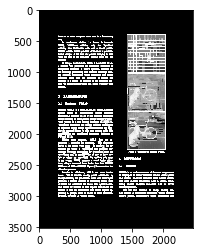

In [15]:
fig = plt.figure()
plt.imshow(closing,cmap="gray")
plt.show()

In [16]:
closing = closing.astype(np.uint8)

ret, labels = cv2.connectedComponents(closing,connectivity=4)

In [17]:
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

print(ret)

457


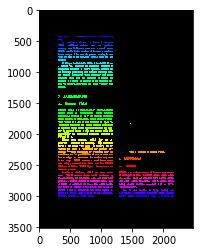

In [18]:
fig = plt.figure()
plt.imshow(labeled_img)
plt.show()

In [19]:
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255

In [20]:
cnts, hierarchy= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

boxes = []
for contour in cnts:
    boxes.append(cv2.boundingRect(contour))

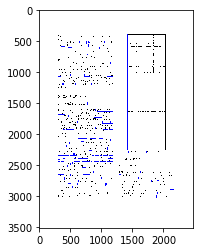

In [21]:
img3 = np.zeros((img.shape[0],img.shape[1],3),np.uint8)
img3[:,:,0] = img
img3[:,:,1] = img
img3[:,:,2] = img

comps = (1-img3)*255
for i in boxes:
    cv2.rectangle(comps,(i[0],i[1]),(i[0]+i[2],i[1]+i[3]),(0,0,255))
fig = plt.figure()
plt.imshow(comps,cmap="gray")
plt.show()

In [22]:
cv2.imwrite("dilate1.pbm",1-dilate1)
cv2.imwrite("erode1.pbm",1-erode1)
cv2.imwrite("dilate2.pbm",1-dilate2)
cv2.imwrite("erode2.pbm",1-erode2)
cv2.imwrite("intersection.pbm",1-intersection)
cv2.imwrite("result.pbm",1-result)
cv2.imwrite("closing.pbm",1-closing)
cv2.imwrite("comps.png",comps)
cv2.imwrite("labeled.png",labeled_img)

True